In [1]:
# %matplotlib osx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

# Как найти точку в прямоугольнике, которая не изменит своего положения при его уменьшении и повороте?

ruSO: [Как найти точку в прямоугольнике, которая не изменит своего положения при его уменьшении и повороте?](https://ru.stackoverflow.com/q/1504743/430734)

```
Ввод:

10 5

3.0 2.5 1.0 2.5 1.0 1.5 3.0 1.5

Вывод: 2.5000 2.0833
```

На Московской городской олимпиаде школьников по информатике, 2004/05
учебный год, задача I весьма похожа, за одним дополнительным упрощением:
"Карта расположена лицевой стороной вверх".

## Аффинное преобразование

Как эффективно использовать ограничение "Переговорка и ее план имеют 
форму прямоугольника", лично мне так и не удалось придумать. Тем более,
что задача неплохо решается в общем случае аффинного преобразования.

$\begin{pmatrix}
f(xy) \\
1
\end{pmatrix}
=
\begin{pmatrix}
a & v \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
xy \\
1
\end{pmatrix}$

Трёх точек координат углов карты и комнаты достаточно для определения
матрицы аффинного преобразования путём решения системы линейных 
уравнений:

$Room^T A^T = Corner^T$

, где координаты точек комнаты и карты дополнены 1.

## Неподвижная точка

Аналогично, неподвижная точка получается решением системы уравнений:

$\begin{pmatrix}
a - I & v \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
fix \\
1
\end{pmatrix}
=
\begin{pmatrix}
0 \\
1
\end{pmatrix}
$

Если входные данные соответствуют условию задачи, то обе системы уравнений
имеют единственное решение.

# Решение

In [2]:
import numpy as np

def fixed_point(rm, cr):
    """Находит неподвижную точку аффинного преобразования:
       (0,0, rm[0],0, rm[0],rm[1], 0,rm[1]) -> cr

       rm - размеры переговорной
       cr - координаты углов плана переговорной внутри переговорной
    """
    rt = np.array([[0.,    0.,    1.],
                   [rm[0], 0.,    1.],
                   [rm[0], rm[1], 1.],
                   [0.,    rm[1], 1.]])
    ct = np.ones((4, 3))
    ct[:, 0] = cr[0::2];
    ct[:, 1] = cr[1::2];
    a = np.linalg.solve(rt[:-1], ct[:-1]).T  # Матрица аффинного преобразования
    ai = a.copy()             # (a - I)*fix == 0
    ai[:-1,:-1] -= np.eye(2)  # fix[2] == 1
    f = np.linalg.solve(ai, [0., 0., 1.])
    np.testing.assert_allclose(ct.T, a@rt.T,
                               rtol=1e-4, atol=1e-4, err_msg="Нехороший план")
    np.testing.assert_allclose([0., 0., 1.], ai@f, 
                               rtol=1e-15, atol=1e-15, err_msg="Нехороший план")
    np.testing.assert_allclose(f, a@f,
                               rtol=1e-15, atol=1e-15, err_msg="Нехороший план")
    return f[:2]

# Тесты

In [3]:
tests = [
    [(10, 5), (4.5, 2.0, 4.5, 4.0, 5.5, 4.0, 5.5, 2.0), (245./48, 145./48)],
    [(10, 5), (4.5, 4.0, 4.5, 2.0, 5.5, 2.0, 5.5, 4.0), (265./52, 155./52)],
    [(10, 5), (5.5, 4.0, 5.5, 2.0, 4.5, 2.0, 4.5, 4.0), (235./48, 145./48)],
    [(10, 5), (5.5, 2.0, 5.5, 4.0, 4.5, 4.0, 4.5, 2.0), (255./52, 155./52)],

    [(10, 5), (1.0, 1.5, 3.0, 1.5, 3.0, 2.5, 1.0, 2.5), (1.25, 1.875)],
    [(10, 5), (3.0, 1.5, 1.0, 1.5, 1.0, 2.5, 3.0, 2.5), (2.5, 1.875)],
    [(10, 5), (3.0, 2.5, 1.0, 2.5, 1.0, 1.5, 3.0, 1.5), (2.5, 12.5 / 6)],
    [(10, 5), (1.0, 2.5, 3.0, 2.5, 3.0, 1.5, 1.0, 1.5), (1.25, 12.5 / 6)],

    [(10, 5), (1.5, 2.5, 3.5, 4.5, 4.5, 3.5, 2.5, 1.5), (2.5, 2.5)],      
    [(10, 5), (1.5, 2.5, 4.5, 4.5, 5.5, 3.5, 2.5, 1.5), (2.875, 2.5625)],       
]
for t in tests:
    fpt = fixed_point(t[0], t[1])
    np.testing.assert_array_max_ulp(t[2], fpt, maxulp=1)
print("Хорь")

Хорь


# Визуализация тестовых наборов

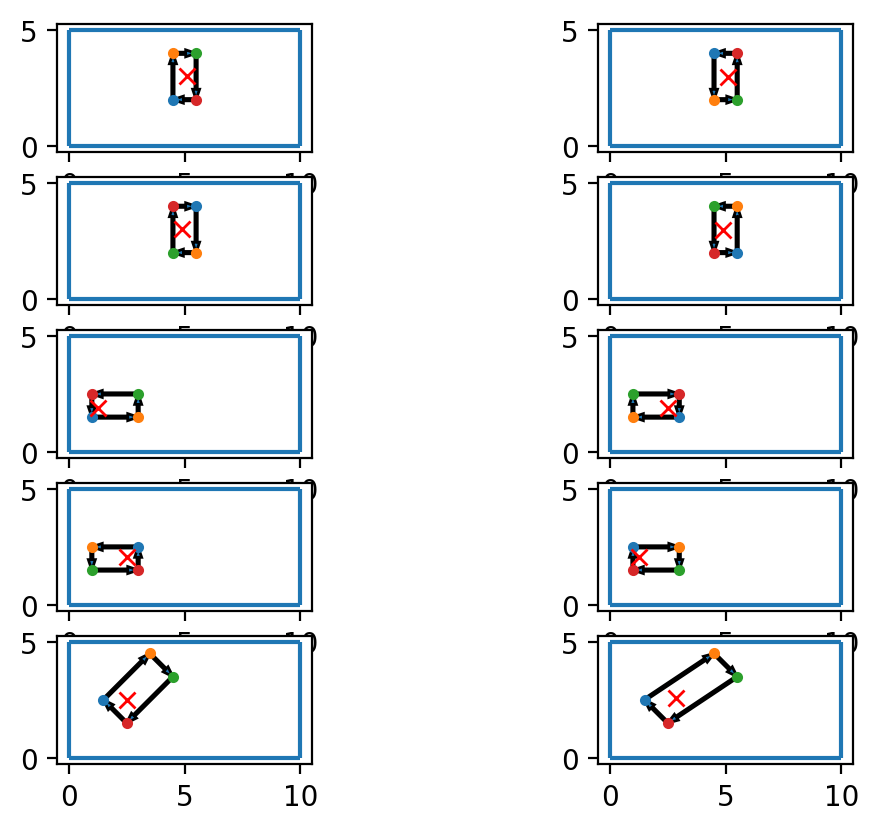

In [4]:
fig, axs = plt.subplots(5, 2)
k = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        ax = axs[i, j]
        t = tests[k]
        k += 1
        ax.set_aspect('equal')
        ax.vlines([0., t[0][0]], 0., t[0][1])
        ax.hlines([0., t[0][1]], 0., t[0][0])
        c = t[1] + t[1]
        for l in range(0, 8, 2):
            ax.arrow(c[l], c[l + 1], c[l + 2] - c[l], c[l + 3] - c[l + 1], 
                     width=0.1, length_includes_head=True)
        for c in zip(t[1][0::2], t[1][1::2]):
            ax.plot(c[0], c[1], '.')
        ax.plot(t[2][0], t[2][1], 'x', c='r')
plt.show()